In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Load the training and validation datasets
train_df = pd.read_csv('train_data.csv')
val_df = pd.read_csv('val_data.csv')

In [3]:
# Separate features and labels for training data
X_train = train_df.drop('Air Quality', axis=1)
y_train = train_df['Air Quality']

# Separate features and labels for validation data
X_val = val_df.drop('Air Quality', axis=1)
y_val = val_df['Air Quality']

In [4]:
# Print the shapes of the resulting sets to verify the load
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (3000, 9)
y_train shape: (3000,)
X_val shape: (1000, 9)
y_val shape: (1000,)


In [5]:
# Create a Decision Tree Classifier with default hyperparameters
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier on the training data
dt_classifier.fit(X_train, y_train)

# Display the tree depth
depth = dt_classifier.get_depth()
print(f"Decision Tree Depth: {depth}")

Decision Tree Depth: 18


   max_depth  train_accuracy  val_accuracy
0          2        0.824333         0.805
1          4        0.905667         0.890
2          6        0.941000         0.906
3          8        0.962000         0.919
4         10        0.975333         0.923


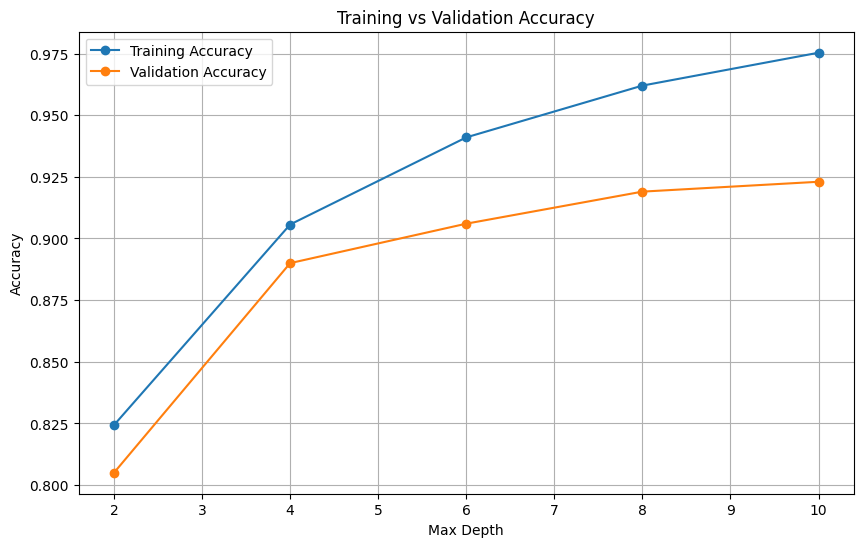

In [6]:
# The above model is very likely overfitting. Choose five different max_depth values to try, lower than the depth of the model found above. Place these in a list called ‘md_list’.
md_list = [2, 4, 6, 8, 10]

# Choose a metric (e.g. accuracy, precision,  𝐹1  score, etc.) to evaluate model performance.
# Here, we use accuracy as the metric

# Create empty lists named similarly to ‘train_md_metric’ and ‘val_md_metric’ to hold values of the metric.
train_md_accuracy = []
val_md_accuracy = []

# For i in md_list:
for i in md_list:
    # Train a model using max_depth=i.
    dt_classifier = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Find predictions on the training and validation sets.
    y_train_pred = dt_classifier.predict(X_train)
    y_val_pred = dt_classifier.predict(X_val)

    # Calculate the chosen metric on training and validation sets. Append the values to their lists.
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    train_md_accuracy.append(train_accuracy)
    val_md_accuracy.append(val_accuracy)

# Create and display a dataframe with md_list, train_md_metric, and val_md_metric as columns. Label the columns.
results_df = pd.DataFrame({
    'max_depth': md_list,
    'train_accuracy': train_md_accuracy,
    'val_accuracy': val_md_accuracy
})
print(results_df)

# Plot the training and validation metric for each model. Revisit the loop if you need to try other values of max_depth to obtain a model that does not overfit.
plt.figure(figsize=(10, 6))
plt.plot(md_list, train_md_accuracy, marker='o', label='Training Accuracy')
plt.plot(md_list, val_md_accuracy, marker='o', label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Based on the results, a max_depth of 4 appears to be a good choice.  While the training accuracy is higher for max_depth values of 6, 8, and 10, the validation accuracy is highest at max_depth=4.  The gap between training and validation accuracy also increases beyond a max_depth of 4, suggesting that the model starts to overfit the training data more significantly.  Therefore, max_depth=4 provides the best balance between model complexity and generalization performance on unseen data.

   min_samples_leaf  train_accuracy  val_accuracy
0                 1        1.000000         0.912
1                 2        0.981333         0.912
2                 4        0.968000         0.913
3                 8        0.952333         0.913
4                16        0.943000         0.912


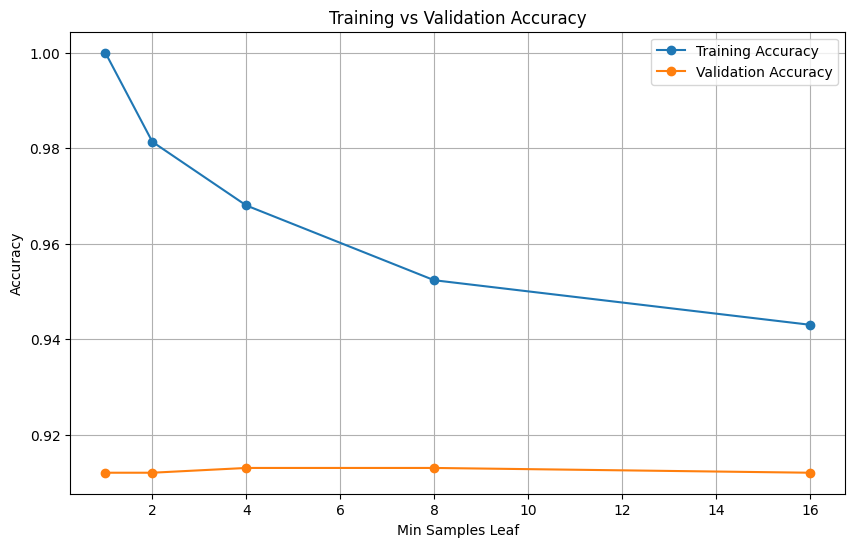

In [7]:
# Choose at least five different min_samples_leaf values to try, starting with a low number (less than 1% of the data length) and increasing by factors of 2.
msl_list = [1, 2, 4, 8, 16]

# Choose the same metric used above. Create empty lists named similarly to ‘train_msl_metric’ and ‘val_msl_metric’ to hold values of the metric.
train_msl_accuracy = []
val_msl_accuracy = []

# For i in msl_list:
for i in msl_list:
    # Train a model using min_samples_leaf=i (with all other hyperparameters set to default values).
    dt_classifier = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Find predictions on the training and validation sets.
    y_train_pred = dt_classifier.predict(X_train)
    y_val_pred = dt_classifier.predict(X_val)

    # Calculate the chosen metric on training and validation sets. Append the values to their lists.
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    train_msl_accuracy.append(train_accuracy)
    val_msl_accuracy.append(val_accuracy)

# Create and display a dataframe with msl_list, train_msl_metric, and val_msl_metric as columns. Label the columns.
results_df = pd.DataFrame({
    'min_samples_leaf': msl_list,
    'train_accuracy': train_msl_accuracy,
    'val_accuracy': val_msl_accuracy
})
print(results_df)

# Plot the training and validation metric for each model. Revisit the loop if you need to try other values of min_samples_leaf.
plt.figure(figsize=(10, 6))
plt.plot(msl_list, train_msl_accuracy, marker='o', label='Training Accuracy')
plt.plot(msl_list, val_msl_accuracy, marker='o', label='Validation Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Based on the results, a min_samples_leaf of 8 appears to be a good choice.  The validation accuracy is highest at min_samples_leaf=8.  The gap between training and validation accuracy also increases beyond a min_samples_leaf of 8, suggesting that the model starts to overfit the training data more significantly.  Therefore, min_samples_leaf=8 provides the best balance between model complexity and generalization performance on unseen data.

   min_impurity_decrease  train_accuracy  val_accuracy
0                0.10000        0.810000         0.790
1                0.01000        0.898000         0.887
2                0.00100        0.962000         0.925
3                0.00010        0.997333         0.930
4                0.00001        1.000000         0.912


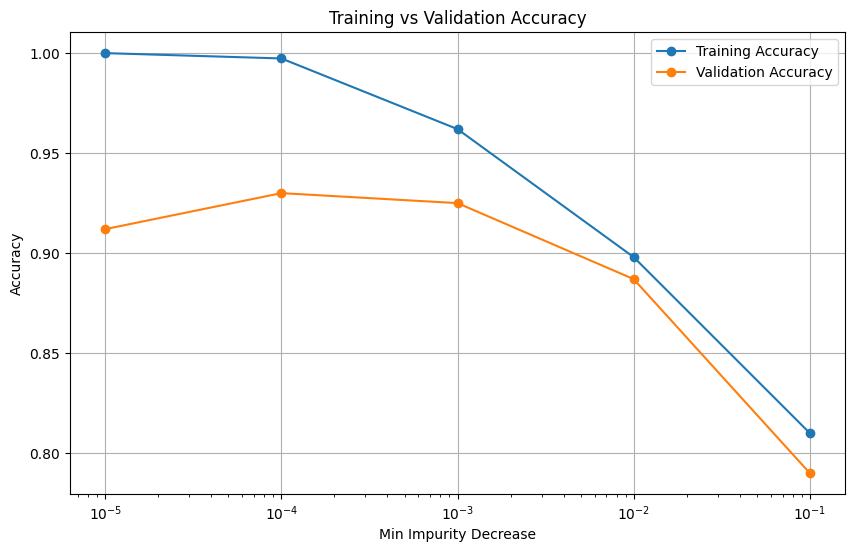

In [8]:
# Choose at least five different min_impurity_decrease values to try, starting with 0.1 and decreasing by a factor of 10 each time.
mid_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# Choose the same metric used above. Create empty lists named similarly to ‘train_mid_metric’ and ‘val_mid_metric’ to hold values of the metric.
train_mid_accuracy = []
val_mid_accuracy = []

# For i in mid_list:
for i in mid_list:
    # Train a model using min_impurity_decrease=i (with all other hyperparameters set to default values).
    dt_classifier = DecisionTreeClassifier(min_impurity_decrease=i, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Find predictions on the training and validation sets.
    y_train_pred = dt_classifier.predict(X_train)
    y_val_pred = dt_classifier.predict(X_val)

    # Calculate the chosen metric on training and validation sets. Append the values to their lists.
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    train_mid_accuracy.append(train_accuracy)
    val_mid_accuracy.append(val_accuracy)

# Create and display a dataframe with mid_list, train_mid_metric, and val_mid_metric as columns. Label the columns.
results_df = pd.DataFrame({
    'min_impurity_decrease': mid_list,
    'train_accuracy': train_mid_accuracy,
    'val_accuracy': val_mid_accuracy
})
print(results_df)

# Plot the training and validation metric for each model. Revisit the loop if you need to try other values of min_impurity_decrease.
plt.figure(figsize=(10, 6))
plt.plot(mid_list, train_mid_accuracy, marker='o', label='Training Accuracy')
plt.plot(mid_list, val_mid_accuracy, marker='o', label='Validation Accuracy')
plt.xlabel('Min Impurity Decrease')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.show()

Based on the results, a min_impurity_decrease of 0.0001 appears to be a good choice. The validation accuracy is the highest and the gap between the training and validation accuracy is relatively small.  A min_impurity_decrease of 0.1 or 0.01 results in very poor performance, likely because the tree is not allowed to split in a meaningful way. A min_impurity_decrease of 0.00001 has a high training accuracy, but the validation accuracy suffers. Therefore, min_impurity_decrease=0.0001 provides the best balance between model complexity and generalization performance on unseen data.

Training Data Metrics:
              precision    recall  f1-score   support

        Good       1.00      0.97      0.99      1200
   Hazardous       0.91      0.59      0.72       300
    Moderate       0.91      0.92      0.92       900
        Poor       0.74      0.90      0.81       600

    accuracy                           0.90      3000
   macro avg       0.89      0.85      0.86      3000
weighted avg       0.91      0.90      0.90      3000

Confusion Matrix (Training Data):
 [[1169    0   31    0]
 [   0  178    1  121]
 [   2    0  826   72]
 [   0   18   45  537]]

Validation Data Metrics:
              precision    recall  f1-score   support

        Good       1.00      0.97      0.98       400
   Hazardous       0.90      0.60      0.72       100
    Moderate       0.88      0.91      0.89       300
        Poor       0.71      0.84      0.77       200

    accuracy                           0.89      1000
   macro avg       0.87      0.83      0.84      1000
weighted

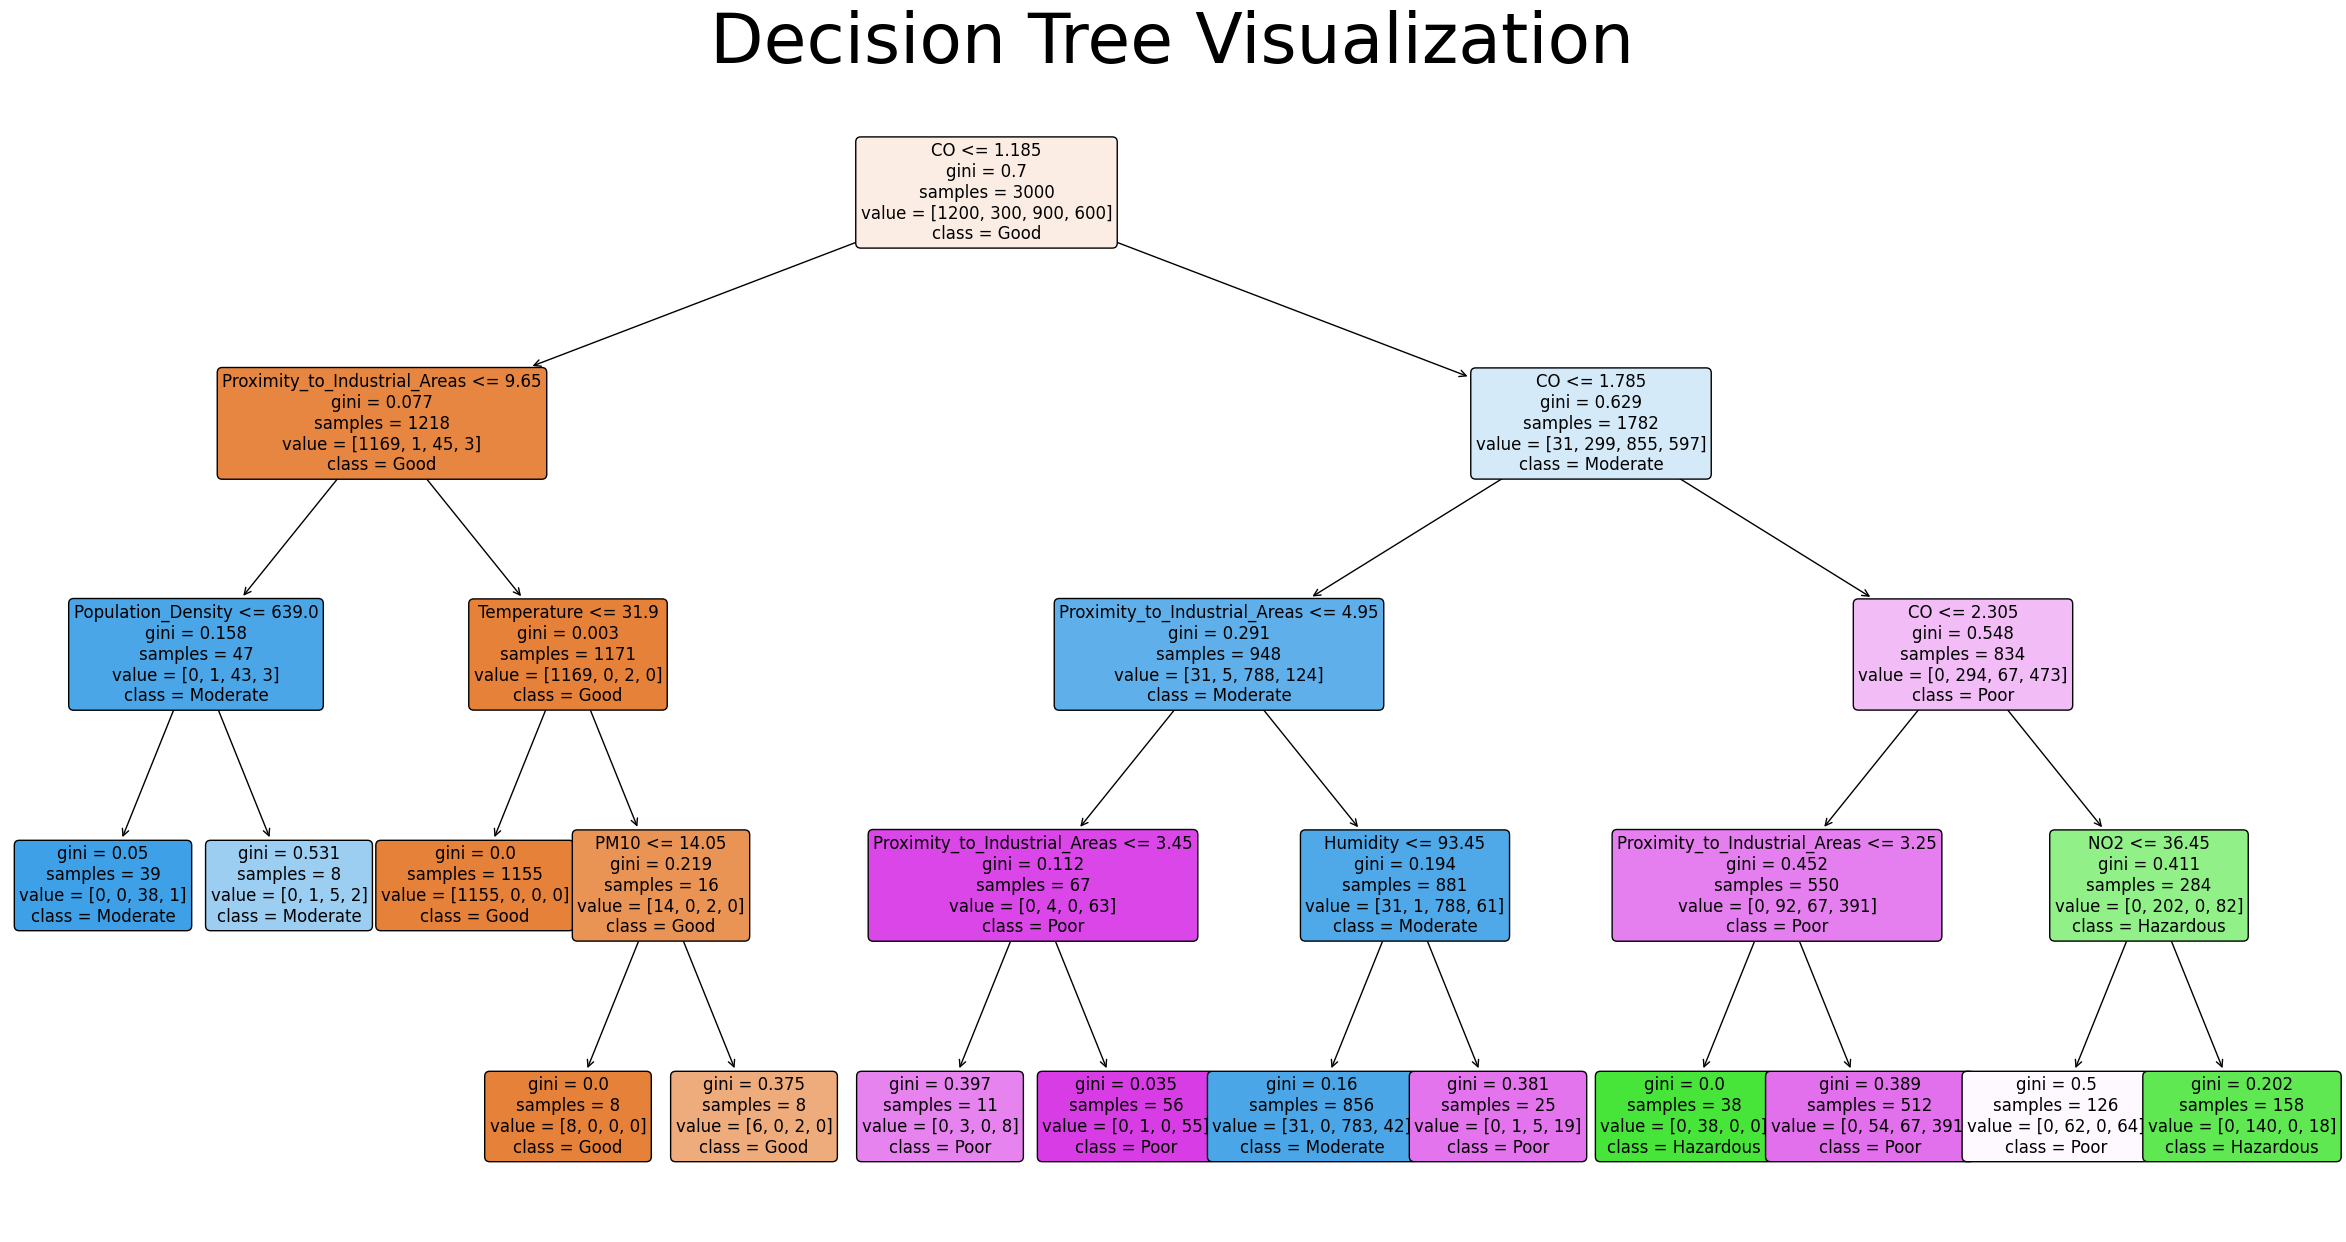

In [12]:
# Train a model using the values you found above for max_depth, min_samples_leaf, and min_impurity_decrease.
best_max_depth = 4
best_min_samples_leaf = 8
best_min_impurity_decrease = 0.0001

dt_classifier = DecisionTreeClassifier(
    max_depth=best_max_depth,
    min_samples_leaf=best_min_samples_leaf,
    min_impurity_decrease=best_min_impurity_decrease,
    random_state=42
)
dt_classifier.fit(X_train, y_train)

# Find predictions for both the training and validation sets.
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)

# Then for both training and validation:
# Use the classification_report and other functions in sklearn to display the metrics you decided upon in the project step ‘data analysis and preparation.’
#   Use the confusion_matrix function in sklearn to display the confusion matrix.
print("Training Data Metrics:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_train_pred))

print("\nValidation Data Metrics:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix (Validation Data):\n", confusion_matrix(y_val, y_val_pred))

#  Use the display_tree method in utils.py (from chapter 9) to display the tree, or use the sklearn function plot_tree().
plt.figure(figsize=(30, 15))  # Increase the figure size

plot_tree(dt_classifier,
          filled=True,              # Fill nodes with color
          feature_names=X_train.columns,  # Add feature names
          class_names=dt_classifier.classes_, #Add class names
          rounded=True,             # Make node corners rounded
          fontsize=12)              # Increase font size

plt.title("Decision Tree Visualization", fontsize=50)  # Enhance the title
plt.show()

Model Performance Discussion
Based on the classification reports and confusion matrices, the decision tree model exhibits the following performance characteristics:

Overall Accuracy: The model achieves an accuracy of 90% on the training data and 89% on the validation data, indicating a reasonable overall performance.

Class-Specific Performance:

Good: The model performs exceptionally well in identifying "Good" air quality, with high precision and recall (1.00 and 0.97, respectively, for both training and validation). There are relatively few false negatives (actual "Good" instances misclassified as other classes) and no false positives.

Hazardous: The model's performance on "Hazardous" air quality is moderate, with a recall of 0.59 and 0.60 for training and validation respectively. This indicates that the model struggles to identify all instances of "Hazardous" air quality, resulting in a substantial number of false negatives. The precision is high at 0.91 and 0.90 for training and validation. This class should be improved, to minimize false negatives.

Moderate: The model performs well in identifying "Moderate" air quality, with a recall of 0.92 and 0.91 for training and validation.

Poor: The model has a lower precision (0.74 and 0.71) compared to recall (0.90 and 0.84) when identifying "Poor" air quality.

Problems to Address:

False Negatives for "Hazardous": The most pressing issue is the substantial number of false negatives for "Hazardous" air quality. This is concerning because underestimating hazardous conditions could have severe health implications.

Trade-off between Precision and Recall for "Poor": The model exhibits a trade-off between precision and recall for "Poor" air quality. While the recall is relatively high, the precision is lower, indicating that the model identifies "Poor" instances more often than other classes, but it also misclassifies other instances as "Poor."

Generalization: While the training and validation metrics are similar, it's essential to acknowledge that the model's performance on entirely new, unseen data may vary. There could be some degree of overfitting.

Further Steps for Improvement
Adjust Class Weights: To address the false negatives for "Hazardous" air quality, consider adjusting the class weights in the decision tree model. By assigning a higher weight to the "Hazardous" class, the model will be penalized more for misclassifying these instances, potentially increasing recall.

Explore Other Models: Experiment with other machine learning models, such as random forests, gradient boosting, or support vector machines, to see if they can provide better performance, particularly in identifying "Hazardous" conditions.

Collect More Data: Gathering more data, especially for the "Hazardous" and "Poor" categories, could help the model learn more robust patterns and improve its generalization ability.

Refine Feature Engineering: Examine the existing features and consider creating new features that could better capture the nuances of air quality. Feature selection or dimensionality reduction techniques might also be beneficial.

Threshold Adjustment: Since the task of this project is to minimize false negatives, it is recommended to adjust the threshold to classify poor/hazardous air quality more often. If the air quality is actually good but is predicted as poor/hazardous, this is better than predicting a dangerous case as good and having no action taken.

By implementing these improvements, we can build a more robust and reliable air quality prediction model that effectively minimizes false negatives for hazardous conditions, ultimately safeguarding public health